In [32]:
import pandas as pd

In [8]:
!huggingface-cli download --repo-type dataset thdai2000/wasabi_raw song.parquet --local-dir './data'

data/song.parquet


In [33]:
df_song = pd.read_parquet('./data/song.parquet')
df_song

,song_id,song_title,song_publication_date,language_detect,bpm,gain,chord_sequence,chord_confidence,chord_duration,lyrics,...,artist_name,artist_location,artist_type,artist_gender,album_id,album_title,album_genre,album_publication_date,album_length,album_country
0,5714dec325ac0d8aee3804e7,Turn It Up,1998-06-22,english,77.0,-29.4,"[{'end': 16.150000000000002, 'label': 'Amaj', ...",0.746509,93.023107,Turn it up<br>I don&apos;t know where you&apos...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
1,5714dec325ac0d8aee3804e8,Foghorn,1998-06-22,english,106.0,-10.6,"[{'end': 1.6500000000000001, 'label': 'E7', 's...",0.807170,184.007596,"Sick of you, how old do you think you are?<br>...",...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
2,5714dec325ac0d8aee3804e9,Cheeky Monkey,1998-06-22,english,185.0,-10.4,"[{'end': 1.55, 'label': 'Emaj', 'start': 0.0},...",0.714021,216.007596,My name is Jason<br>I&apos;ll rock yer face in...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
3,5714dec325ac0d8aee3804ea,No. 1,1998-06-22,english,96.0,-10.6,"[{'end': 4.65, 'label': 'Gmin7', 'start': 0.0}...",0.767492,230.009229,Got to get out more<br>Get in the place<br>Got...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
4,5714dec325ac0d8aee3804eb,Bad Idea,1998-06-22,english,101.0,-9.9,"[{'end': 1.7500000000000002, 'label': 'Amaj7',...",0.787385,141.010045,Bad idea (x4) <br><br>Ninety-nine per cent is ...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079505,57c92594e5c453a411c77445,Your Not Ready,,english,NaN,NaN,None,NaN,NaN,[Young Buck] (chorus)<br><br>You not ready for...,...,50 Cent,"['United States', 'New York', 'Queens']",Person,Male,57c92594e5c453a411c7734d,Other Songs,,,None,None
2079506,57c92594e5c453a411c77446,Eminem & 50 Cent:Jimmy Crack Corn,,english,NaN,NaN,None,NaN,NaN,"[em &amp; 50]Man, lets go.<br>[eminem]hey yo f...",...,50 Cent,"['United States', 'New York', 'Queens']",Person,Male,57c92594e5c453a411c7734d,Other Songs,,,None,None
2079507,57c92594e5c453a411c77447,Eminem & 50 Cent:The Re-Up,,english,NaN,NaN,None,NaN,NaN,"[Intro - Eminem] <br><br>[Beatboxing] Yeah, w...",...,50 Cent,"['United States', 'New York', 'Queens']",Person,Male,57c92594e5c453a411c7734d,Other Songs,,,None,None
2079508,57c92594e5c453a411c77448,"Eminem, 50 Cent, Ca$his & Lloyd Banks:You Don'...",2006-12-01,english,170.0,-6.8,"[{'end': 2.65, 'label': 'Ebmin', 'start': 0.0}...",0.462999,258.011429,[ Intro ]<br>Shady...Yeah..<br><br>Who run it?...,...,50 Cent,"['United States', 'New York', 'Queens']",Person,Male,57c92594e5c453a411c7734d,Other Songs,,,None,None


In [34]:
df_song['chord_confidence'].describe()

count    509931.000000
mean          0.709759
std           0.120479
min           0.000000
25%           0.635548
50%           0.724219
75%           0.799083
max           1.000000
Name: chord_confidence, dtype: float64

In [35]:
df_song['chord_duration'].describe()

count    509931.000000
mean        233.161848
std          94.155054
min           0.052245
25%         183.302290
50%         224.001066
75%         267.885714
max        5790.747188
Name: chord_duration, dtype: float64

In [36]:
df_song_with_chord = df_song[(df_song['chord_sequence'].notnull()) 
                             & (df_song['chord_confidence'] > 0.7) 
                             & (df_song['chord_duration'] > 10) 
                             & (df_song['chord_duration'] < 600)]
df_song_with_chord

,song_id,song_title,song_publication_date,language_detect,bpm,gain,chord_sequence,chord_confidence,chord_duration,lyrics,...,artist_name,artist_location,artist_type,artist_gender,album_id,album_title,album_genre,album_publication_date,album_length,album_country
0,5714dec325ac0d8aee3804e7,Turn It Up,1998-06-22,english,77.0,-29.4,"[{'end': 16.150000000000002, 'label': 'Amaj', ...",0.746509,93.023107,Turn it up<br>I don&apos;t know where you&apos...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
1,5714dec325ac0d8aee3804e8,Foghorn,1998-06-22,english,106.0,-10.6,"[{'end': 1.6500000000000001, 'label': 'E7', 's...",0.807170,184.007596,"Sick of you, how old do you think you are?<br>...",...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
2,5714dec325ac0d8aee3804e9,Cheeky Monkey,1998-06-22,english,185.0,-10.4,"[{'end': 1.55, 'label': 'Emaj', 'start': 0.0},...",0.714021,216.007596,My name is Jason<br>I&apos;ll rock yer face in...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
3,5714dec325ac0d8aee3804ea,No. 1,1998-06-22,english,96.0,-10.6,"[{'end': 4.65, 'label': 'Gmin7', 'start': 0.0}...",0.767492,230.009229,Got to get out more<br>Get in the place<br>Got...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
4,5714dec325ac0d8aee3804eb,Bad Idea,1998-06-22,english,101.0,-9.9,"[{'end': 1.7500000000000002, 'label': 'Amaj7',...",0.787385,141.010045,Bad idea (x4) <br><br>Ninety-nine per cent is ...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079022,57c92566e5c453a411c7724f,Goodbyes,2012-11-19,english,136.0,-6.2,"[{'end': 2.15, 'label': 'Amin', 'start': 0.0},...",0.753793,230.635102,There&apos;s so much that I would say if I cou...,...,3 Doors Down,"['United States', 'Mississippi', 'Escatawpa']",Group,None,57c92566e5c453a411c7724c,The Greatest Hits,Post-Grunge,2012,46:58,XE
2079023,57c92566e5c453a411c77251,The Champion In Me,2008-11-07,english,157.8,-7.7,"[{'end': 1.8500000000000003, 'label': 'Amaj', ...",0.745238,209.973311,"You said that mountains too high,<br>You said ...",...,3 Doors Down,"['United States', 'Mississippi', 'Escatawpa']",Group,None,57c92566e5c453a411c77250,Songs on Compilations and Soundtracks,,,None,None
2079154,57c92594e5c453a411c772de,"Lloyd Banks:Born Alone, Die Alone",2005-10-02,english,176.0,-9.4,"[{'end': 25.750000000000004, 'label': 'Dmin', ...",0.822062,180.376576,(Chorus)<br>I came in this world by myself (uh...,...,50 Cent,"['United States', 'New York', 'Queens']",Person,Male,57c92594e5c453a411c772d2,[[Get Rich Or Die Tryin' (2005)|Get Rich Or Di...,,,None,None
2079273,57c92594e5c453a411c7735d,Bring It All To Me,2000-07-18,english,99.0,-11.1,"[{'end': 5.15, 'label': 'Emaj', 'start': 0.0},...",0.735964,245.708821,"[Natina] (Shamari)<br>Yo, whoo this is hot, uh...",...,50 Cent,"['United States', 'New York', 'Queens']",Person,Male,57c92594e5c453a411c7734d,Other Songs,,,None,None


In [37]:
df_song_with_genres = df_song_with_chord[(df_song_with_chord['album_genre']!="")]
df_song_with_genres

,song_id,song_title,song_publication_date,language_detect,bpm,gain,chord_sequence,chord_confidence,chord_duration,lyrics,...,artist_name,artist_location,artist_type,artist_gender,album_id,album_title,album_genre,album_publication_date,album_length,album_country
0,5714dec325ac0d8aee3804e7,Turn It Up,1998-06-22,english,77.0,-29.4,"[{'end': 16.150000000000002, 'label': 'Amaj', ...",0.746509,93.023107,Turn it up<br>I don&apos;t know where you&apos...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
1,5714dec325ac0d8aee3804e8,Foghorn,1998-06-22,english,106.0,-10.6,"[{'end': 1.6500000000000001, 'label': 'E7', 's...",0.807170,184.007596,"Sick of you, how old do you think you are?<br>...",...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
2,5714dec325ac0d8aee3804e9,Cheeky Monkey,1998-06-22,english,185.0,-10.4,"[{'end': 1.55, 'label': 'Emaj', 'start': 0.0},...",0.714021,216.007596,My name is Jason<br>I&apos;ll rock yer face in...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
3,5714dec325ac0d8aee3804ea,No. 1,1998-06-22,english,96.0,-10.6,"[{'end': 4.65, 'label': 'Gmin7', 'start': 0.0}...",0.767492,230.009229,Got to get out more<br>Get in the place<br>Got...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
4,5714dec325ac0d8aee3804eb,Bad Idea,1998-06-22,english,101.0,-9.9,"[{'end': 1.7500000000000002, 'label': 'Amaj7',...",0.787385,141.010045,Bad idea (x4) <br><br>Ninety-nine per cent is ...,...,A,"['England', 'West Yorkshire', 'Leeds']",Group,None,5714debb25ac0d8aee34d59a,How Ace Are Buildings,Alternative Rock,1997,57:52,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079015,57c92566e5c453a411c77247,Believer,2011-07-15,english,173.0,-5.8,"[{'end': 1.3500000000000003, 'label': 'Amin', ...",0.775098,178.208413,I would have been in doubt<br>When this starte...,...,3 Doors Down,"['United States', 'Mississippi', 'Escatawpa']",Group,None,57c92566e5c453a411c7723b,Time Of My Life,Alternative Rock,2011,41:30,None
2079016,57c92566e5c453a411c77248,The Silence Remains,2011-07-15,english,168.0,-6.8,"[{'end': 2.45, 'label': 'Dmaj', 'start': 0.0},...",0.768109,219.481882,This world asks for so much<br>Despite what yo...,...,3 Doors Down,"['United States', 'Mississippi', 'Escatawpa']",Group,None,57c92566e5c453a411c7723b,Time Of My Life,Alternative Rock,2011,41:30,None
2079019,57c92566e5c453a411c7724b,Every Time You Go,2011-01-01,english,126.0,-5.9,"[{'end': 0.45, 'label': 'Amaj7', 'start': 0.0}...",0.854719,229.852494,I savor every minute that you&apos;re here<br>...,...,3 Doors Down,"['United States', 'Mississippi', 'Escatawpa']",Group,None,57c92566e5c453a411c7723b,Time Of My Life,Alternative Rock,2011,41:30,None
2079020,57c92566e5c453a411c7724d,One Light,2012-10-30,english,170.0,-5.9,"[{'end': 3.75, 'label': 'Emaj', 'start': 0.0},...",0.741935,176.613878,"Standing humble, a fist of rage<br>A silent ar...",...,3 Doors Down,"['United States', 'Mississippi', 'Escatawpa']",Group,None,57c92566e5c453a411c7724c,The Greatest Hits,Post-Grunge,2012,46:58,XE


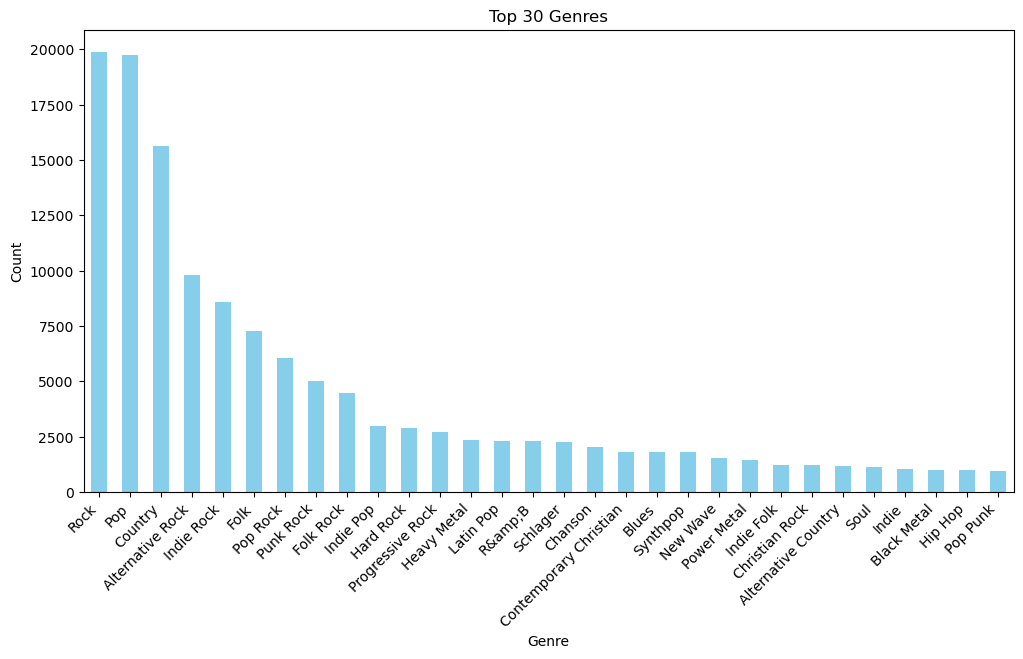

In [38]:
import matplotlib.pyplot as plt

# Get the top 30 genres
top_30_genres = df_song_with_genres['album_genre'].value_counts().head(30)

# Plot the histogram
top_30_genres.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 30 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('./images/top_30_genres.png', bbox_inches='tight')
plt.show()

In [39]:
df_song_with_genres['album_genre'].nunique()

368

/tmp/ipykernel_2395250/2570903377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_song_with_genres['song_publication_date'] = pd.to_datetime(df_song_with_genres['song_publication_date'], errors='coerce')


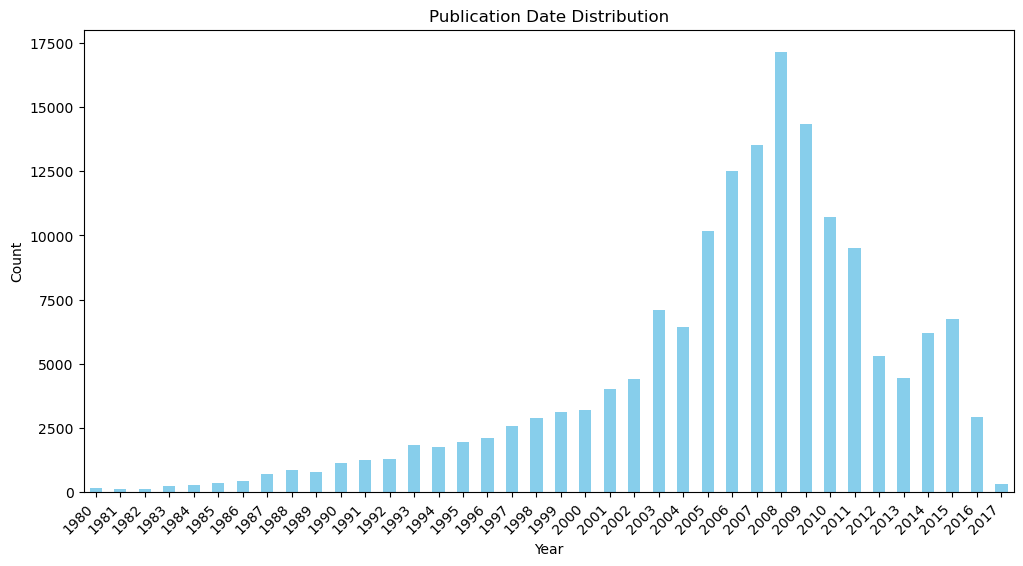

In [41]:
# Convert publicationDate to datetime
df_song_with_genres['song_publication_date'] = pd.to_datetime(df_song_with_genres['song_publication_date'], errors='coerce')
df_song_with_genres_select = df_song_with_genres[(df_song_with_genres['song_publication_date'] > '1980') & 
                    (df_song_with_genres['song_publication_date'] < '2021')]

# Plot the histogram
plt.figure(figsize=(12, 6))
df_song_with_genres_select['song_publication_date'].dt.year.dropna().value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Publication Date Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('./images/date_distribution.png', bbox_inches='tight')
plt.show()

In [42]:
df_song_with_genres['chord_sequence'].tolist()[0]

array([{'end': 16.150000000000002, 'label': 'Amaj', 'start': 0.0},
       {'end': 18.05, 'label': 'Dmaj', 'start': 16.150000000000002},
       {'end': 19.150000000000002, 'label': 'Amaj', 'start': 18.05},
       {'end': 21.150000000000002, 'label': 'Bmin7', 'start': 19.150000000000002},
       {'end': 22.450000000000003, 'label': 'Amaj', 'start': 21.150000000000002},
       {'end': 24.350000000000005, 'label': 'Dmaj', 'start': 22.450000000000003},
       {'end': 25.350000000000005, 'label': 'Amaj', 'start': 24.350000000000005},
       {'end': 27.350000000000005, 'label': 'Dmaj', 'start': 25.350000000000005},
       {'end': 28.450000000000003, 'label': 'Amaj', 'start': 27.350000000000005},
       {'end': 30.350000000000005, 'label': 'Dmaj', 'start': 28.450000000000003},
       {'end': 31.450000000000003, 'label': 'Amaj', 'start': 30.350000000000005},
       {'end': 33.449999999999996, 'label': 'Bmin7', 'start': 31.450000000000003},
       {'end': 34.75, 'label': 'Amaj', 'start': 33.4499

In [43]:
def extract_chord_percentage(chord_sequence):

    chord_sequence = chord_sequence.tolist()
    chord_duration = {}

    for song_chord in chord_sequence:
        for chord in song_chord:

            duration = chord['end'] - chord['start']
            if chord['label'] in chord_duration:
                chord_duration[chord['label']] += duration
            else:
                chord_duration[chord['label']] = duration
    
    total_duration = sum(chord_duration.values())
    chord_percentage = {k: v / total_duration for k, v in chord_duration.items()}

    return pd.DataFrame(chord_percentage, index=[0])


df_genre_chord_freq = df_song_with_genres.groupby('album_genre')['chord_sequence'].apply(extract_chord_percentage)

In [44]:
top_30_genre_names = top_30_genres.index.tolist()
top_30_genre_names

['Rock',
 'Pop',
 'Country',
 'Alternative Rock',
 'Indie Rock',
 'Folk',
 'Pop Rock',
 'Punk Rock',
 'Folk Rock',
 'Indie Pop',
 'Hard Rock',
 'Progressive Rock',
 'Heavy Metal',
 'Latin Pop',
 'R&amp;B',
 'Schlager',
 'Chanson',
 'Contemporary Christian',
 'Blues',
 'Synthpop',
 'New Wave',
 'Power Metal',
 'Indie Folk',
 'Christian Rock',
 'Alternative Country',
 'Soul',
 'Indie',
 'Black Metal',
 'Hip Hop',
 'Pop Punk']

In [45]:
print(df_song_with_genres['album_genre'].unique().tolist())

['Alternative Rock', 'Post-Hardcore', 'Pop Punk', 'Metalcore', 'Deathcore', 'Experimental Rock', 'Pop', 'New Wave', 'Pop Rock', 'Indie Rock', 'Groove Metal', 'Gothic Metal', 'Psychedelic Rock', 'Post-Punk', 'Doom Metal', 'Disco', 'Alternative Hip Hop', 'Hip Hop', 'Punk Rock', 'Thrash Metal', 'R&amp;B', 'Teen Pop', 'Synthpop', 'Country', 'Contemporary Christian', 'Gospel', 'Christmas', 'Indie Pop', 'Folk', 'Black Metal', 'Melodic Death Metal', 'Steampunk', 'Symphonic Metal', 'Christian Rock', 'Gangsta Rap', 'Death Metal', 'Hard Rock', 'Rock', 'Heavy Metal', 'Dance', 'Folk Rock', 'Deutschrock', 'Volkslied', 'East Coast Hip Hop', 'Dream Pop', 'Industrial Rock', 'Electronica', 'Soul', 'Nu Metal', 'Singer-Songwriter', 'New Age', 'Brazilian', 'Underground Hip Hop', 'Hardcore Punk', 'Electronic', 'Electro House', 'Progressive Rock', 'Ska Punk', 'Post-Metal', 'Grindcore', 'Shoegazing', 'Downtempo', 'Europop', 'Progressive Metal', 'Medieval', 'Jazz Fusion', 'Jazz', 'Stoner Rock', 'French Pop', 

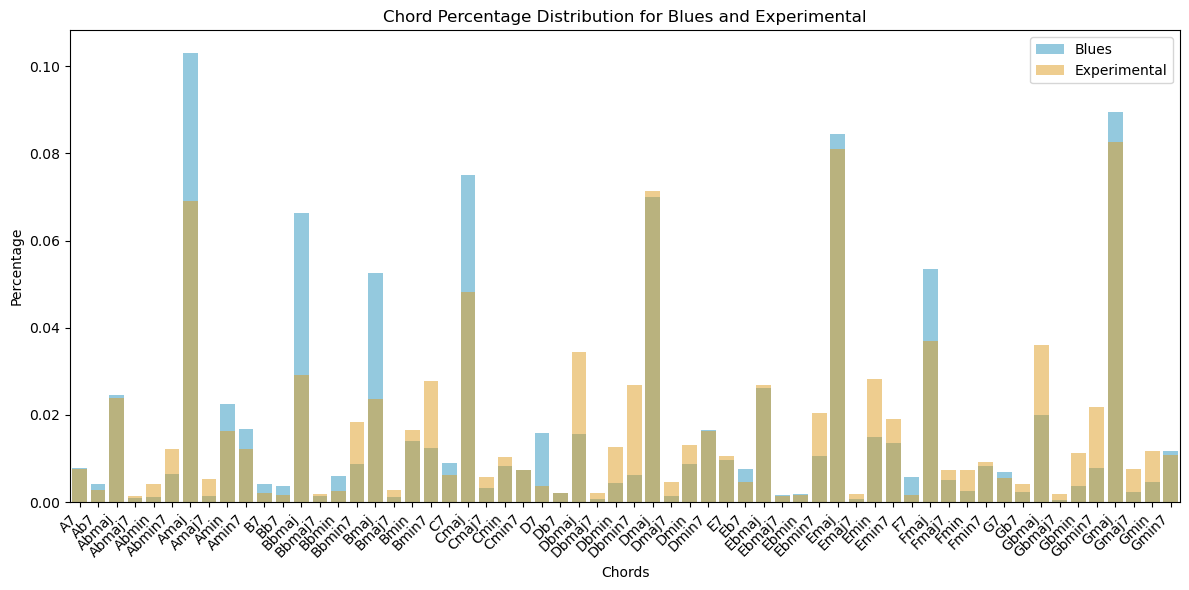

In [46]:
import seaborn as sns

col_names = df_genre_chord_freq.columns
df_genre_chord_freq = df_genre_chord_freq[sorted(col_names)]
# Normalize each row to sum up to 1
df_genre_chord_freq.fillna(0, inplace=True)
df_genre_chord_freq_T = df_genre_chord_freq.T
# df_genre_chord_freq_T = df_genre_chord_freq_T[top_30_genre_names]

# Plot the bar chart for the genre 'Blues'
plt.figure(figsize=(12, 6))
sns.barplot(x=df_genre_chord_freq_T.index, y=df_genre_chord_freq_T['Blues'][0], color='skyblue', label='Blues')
sns.barplot(x=df_genre_chord_freq_T.index, y=df_genre_chord_freq_T['Experimental'][0], color='orange', label='Experimental', alpha=0.5)
plt.title('Chord Percentage Distribution for Blues and Experimental')
plt.xlabel('Chords')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('./images/chord_percentage_blues_experimental.png', bbox_inches='tight')
plt.show()


In [112]:
df_song_with_genres.groupby('artist_name')['song_id'].count().sort_values(ascending=False).sample(20)

artist_name
Intocable                  67
Bob Lind                   13
The Velvet Underground     60
Holopaw                    27
Rose Royce                 18
Priscilla Renea            11
Front 242                  59
Kelley Stoltz              18
Trent Dabbs                27
Trik Turner                 2
E.S. Posthumus             19
David Houston               1
The Welcome Wagon           5
Jürgen Von Der Lippe       46
David Gray                100
Marcella Bella             68
Skeeter Davis             136
Life In Your Way           10
Bear Hands                 14
Suicide Silence             4
Name: song_id, dtype: int64

In [140]:
# Filter songs before and after 2005
df_before_2005 = df_song_with_genres[df_song_with_genres['song_publication_date'] < '2005-01-01']
df_after_2005 = df_song_with_genres[df_song_with_genres['song_publication_date'] >= '2005-01-01']

# Count songs for each artist
count_before_2005 = df_before_2005.groupby('artist_name')['song_id'].count()
count_after_2005 = df_after_2005.groupby('artist_name')['song_id'].count()

# Combine counts into a single DataFrame
artist_counts = pd.DataFrame({
    'before_2005': count_before_2005,
    'after_2005': count_after_2005
}).fillna(0)

# Calculate the absolute difference and filter artists with nearly equal counts
artist_counts['difference'] = abs(artist_counts['before_2005'] - artist_counts['after_2005'])
artists_nearly_equal = artist_counts[(artist_counts['difference'] <= 5) & (artist_counts['before_2005'] > 10)]  # Adjust threshold as needed

artists_nearly_equal.sample(20)

,before_2005,after_2005,difference
artist_name,,,
The Moffatts,13.0,13.0,0.0
The Pastels,28.0,25.0,3.0
Sara Evans,39.0,38.0,1.0
Kelly Joe Phelps,28.0,26.0,2.0
Lilys,16.0,11.0,5.0
Tim Hardin,32.0,29.0,3.0
Jill Sobule,23.0,20.0,3.0
Our Lady Peace,36.0,32.0,4.0
Tara MacLean,16.0,13.0,3.0


In [132]:
artist_name = 'New Order'
df_1 = df_song_with_genres[(df_song_with_genres['artist_name']==artist_name) & (df_song_with_genres['song_publication_date'] < '2005')]['chord_sequence']
df_2 = df_song_with_genres[(df_song_with_genres['artist_name']==artist_name) & (df_song_with_genres['song_publication_date'] > '2005')]['chord_sequence']
print(df_1.shape)
print(df_2.shape)

(32,)
(31,)


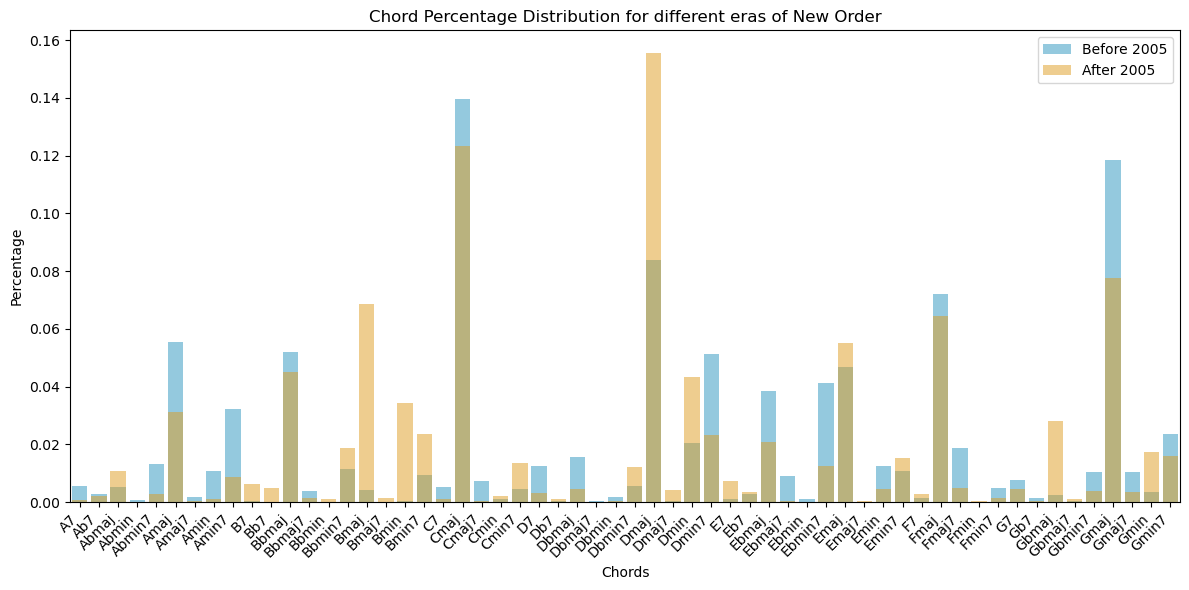

In [133]:
df_1_chord_freq = extract_chord_percentage(df_1)
df_2_chord_freq = extract_chord_percentage(df_2)
df_1_2 = pd.concat([df_1_chord_freq, df_2_chord_freq], axis=0)
df_1_2.fillna(0, inplace=True)
col_names = df_1_2.columns
df_1_2 = df_1_2[sorted(col_names)]
df_1_2.set_index(pd.Index(['Before 2000', 'After 2010']), inplace=True)
df_1_2_T = df_1_2.T

# Plot the bar chart for the genre 'Blues'
plt.figure(figsize=(12, 6))
sns.barplot(x=df_1_2_T.index, y=df_1_2_T['Before 2000'], color='skyblue', label='Before 2005')
sns.barplot(x=df_1_2_T.index, y=df_1_2_T['After 2010'], color='orange', label='After 2005', alpha=0.5)
plt.title('Chord Percentage Distribution for different eras of {}'.format(artist_name))
plt.xlabel('Chords')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('./images/chord_era_compare.png', bbox_inches='tight')
plt.show()